# Problem 1
A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data (Wholesale Customer.csv) consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

1.1. Use methods of descriptive statistics to summarize data.
Which Region and which Channel seems to spend more?
Which Region and which Channel seems to spend less?

1.2. There are 6 different varieties of items are considered.
Do all varieties show similar behaviour across Region and Channel?

1.3. On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour?
Which items shows the least inconsistent behaviour?

1.4. Are there any outliers in the data?

1.5. On the basis of this report, what are the recommendations?

### About  the Wholesale Data :

1) Channel (Nominal) : Retail or Hotel 

2) Region (Nominal) : Oporto or Lisbon or Other

3) Fresh (Continuous) : Annual spending on fresh products

4) Milk (Continuous) : Annual spending on milk products 

5) Grocery (Continuous) : Annual spending on grocery products

6) Frozen (Continuous) : Annual spending on frozen products 

7) Detergents_Paper (Continuous) : Annual spending on detergents and paper products 

8) Delicatessen (Continuous) : Annual spending on delicatessen products 

In [1]:
#Loading the necessary libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns   
import matplotlib.pyplot as plt
sns.set(color_codes=True) 
%matplotlib inline
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
from statsmodels.stats import weightstats as stests

In [2]:
#Loading 'Wholesale' data
data=pd.read_csv('Wholesale Customer.csv')

## 1.1.  Use methods of descriptive statistics to summarize data

In [3]:
#Descriptive Statistics of the dataset:
data_df=data.drop(['Buyer/Spender'],axis=1)
data_df
data_df.describe().transpose()

#Count- As we can see from the below output, each variable contains 440 data points

#Mean- This is highly affected by outliers; As observed, the average spending for 'Fresh' product is the highest and 'Delicatessen' product is the lowest

#Standard Deviation- It shows us how the data points are spread across the mean; Smaller the value, closer is the data point to mean and more consistent and vice versa
#'Fresh' products seems to have the highest standard deviation and 'Delicatessen' products have the lowest standard deviation

#Median- Shows us the 50th percentile of the dataset and is the least affected by the outlier

#Min and Max- Shows the smallest and the largest values of the dataset
#From the output, we can see that the minimum and maximum are quite far away from each other

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


## 1.1.  Which Region and which Channel seems to spend more?
##         Which Region and which Channel seems to spend less?

In [4]:
#Grouping the data by 'Channel' and 'Region' with respect to 'Items' and summing them across
data_df_1_a=data.groupby(['Channel','Region'])['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'].sum()
data_df_1_a

C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Channel Region                                                        
Hotel   Lisbon   761233   228342   237542  184512             56081   
        Oporto   326215    64519   123074  160861             13516   
        Other   2928269   735753   820101  771606            165990   
Retail  Lisbon    93600   194112   332495   46514            148055   
        Oporto   138506   174625   310200   29271            159795   
        Other   1032308  1153006  1675150  158886            724420   

                Delicatessen  
Channel Region                
Hotel   Lisbon         70632  
        Oporto         30965  
        Other         320358  
Retail  Lisbon         33695  
        Oporto         23541  
        Other         191752

In [5]:
#Now summing all 6 items together
sum_data_df_1_a=data_df_1_a.sum(axis=1)

In [6]:
#sorting the summed up values and arranging them in descending order
sum_data_df_1_a.sort_values(ascending=False)

Channel  Region
Hotel    Other     5742077
Retail   Other     4935522
Hotel    Lisbon    1538342
Retail   Lisbon     848471
         Oporto     835938
Hotel    Oporto     719150
dtype: int64

In [7]:
#To get the maximum value from the summed up ('sum_data_df_1_a') values
sum_data_df_1_a.sort_values(ascending=False).head(1)
#From this we see that 'Hotel' (Channel) and 'Other' (Region) spends the MOST

Channel  Region
Hotel    Other     5742077
dtype: int64

In [8]:
#To get the minimum value from the summed up ('sum_data_df_1_a') values
sum_data_df_1_a.sort_values(ascending=True).head(1)
#From this we see that 'Hotel' (Channel) and 'Oporto' (Region) spends the LEAST

Channel  Region
Hotel    Oporto    719150
dtype: int64

## 1.2. There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?

In [9]:
data_df_1_Channel=data_df.groupby(['Channel'])['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
data_df_1_Channel.sum()

C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955
Retail,1264414,1521743,2317845,234671,1032270,248988


In [10]:
data_df_1_Channel.describe().T

Channel                         Hotel        Retail
Fresh            count     298.000000    142.000000
                 mean    13475.560403   8904.323944
                 std     13831.687502   8987.714750
                 min         3.000000     18.000000
                 25%      4070.250000   2347.750000
                 50%      9581.500000   5993.500000
                 75%     18274.750000  12229.750000
                 max    112151.000000  44466.000000
Milk             count     298.000000    142.000000
                 mean     3451.724832  10716.500000
                 std      4352.165571   9679.631351
                 min        55.000000    928.000000
                 25%      1164.500000   5938.000000
                 50%      2157.000000   7812.000000
                 75%      4029.500000  12162.750000
                 max     43950.000000  73498.000000
Grocery          count     298.000000    142.000000
                 mean     3962.137584  16322.852113
                 std      3545.513391  12267.318094
                 min         3.000000   2743.000000
                 25%      1703.750000   9245.250000
                 50%      2684.000000  12390.000000
                 75%      5076.750000  20183.500000
                 max     21042.000000  92780.000000
Frozen           count     298.000000    142.000000
                 mean     3748.251678   1652.612676
                 std      5643.912500   1812.803662
                 min        25.000000     33.000000
                 25%       830.000000    534.250000
                 50%      2057.500000   1081.000000
                 75%      4558.750000   2146.750000
                 max     60869.000000  11559.000000
Detergents_Paper count     298.000000    142.000000
                 mean      790.560403   7269.507042
                 std      1104.093673   6291.089697
                 min         3.000000    332.000000
                 25%       183.250000   3683.500000
                 50%       385.500000   5614.500000
                 75%       899.500000   8662.500000
                 max      6907.000000  40827.000000
Delicatessen     count     298.000000    142.000000
                 mean     1415.956376   1753.436620
                 std      3147.426922   1953.797047
                 min         3.000000      3.000000
                 25%       379.000000    566.750000
                 50%       821.000000   1350.000000
                 75%      1548.000000   2156.000000
                 max     47943.000000  16523.000000

In [11]:
data_df_1_Region=data_df.groupby(['Region'])['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
data_df_1_Region.sum()

C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327
Oporto,464721,239144,433274,190132,173311,54506
Other,3960577,1888759,2495251,930492,890410,512110


In [12]:
data_df_1_Region.describe().T

Region                        Lisbon        Oporto          Other
Fresh            count     77.000000     47.000000     316.000000
                 mean   11101.727273   9887.680851   12533.471519
                 std    11557.438575   8387.899211   13389.213115
                 min       18.000000      3.000000       3.000000
                 25%     2806.000000   2751.500000    3350.750000
                 50%     7363.000000   8090.000000    8752.500000
                 75%    15218.000000  14925.500000   17406.500000
                 max    56083.000000  32717.000000  112151.000000
Milk             count     77.000000     47.000000     316.000000
                 mean    5486.415584   5088.170213    5977.085443
                 std     5704.856079   5826.343145    7935.463443
                 min      258.000000    333.000000      55.000000
                 25%     1372.000000   1430.500000    1634.000000
                 50%     3748.000000   2374.000000    3684.500000
                 75%     7503.000000   5772.500000    7198.750000
                 max    28326.000000  25071.000000   73498.000000
Grocery          count     77.000000     47.000000     316.000000
                 mean    7403.077922   9218.595745    7896.363924
                 std     8496.287728  10842.745314    9537.287778
                 min      489.000000   1330.000000       3.000000
                 25%     2046.000000   2792.500000    2141.500000
                 50%     3838.000000   6114.000000    4732.000000
                 75%     9490.000000  11758.500000   10559.750000
                 max    39694.000000  67298.000000   92780.000000
Frozen           count     77.000000     47.000000     316.000000
                 mean    3000.337662   4045.361702    2944.594937
                 std     3092.143894   9151.784954    4260.126243
                 min       61.000000    131.000000      25.000000
                 25%      950.000000    811.500000     664.750000
                 50%     1801.000000   1455.000000    1498.000000
                 75%     4324.000000   3272.000000    3354.750000
                 max    18711.000000  60869.000000   36534.000000
Detergents_Paper count     77.000000     47.000000     316.000000
                 mean    2651.116883   3687.468085    2817.753165
                 std     4208.462708   6514.717668    4593.051613
                 min        5.000000     15.000000       3.000000
                 25%      284.000000    282.500000     251.250000
                 50%      737.000000    811.000000     856.000000
                 75%     3593.000000   4324.500000    3875.750000
                 max    19410.000000  38102.000000   40827.000000
Delicatessen     count     77.000000     47.000000     316.000000
                 mean    1354.896104   1159.702128    1620.601266
                 std     1345.423340   1050.739841    3232.581660
                 min        7.000000     51.000000       3.000000
                 25%      548.000000    540.500000     402.000000
                 50%      806.000000    898.000000     994.000000
                 75%     1775.000000   1538.500000    1832.750000
                 max     6854.000000   5609.000000   47943.000000

## 1.3.  On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour? Which items shows the least inconsistent behaviour?

In [13]:
#COEFFICIENT OF VARIATION
mean_fresh = data['Fresh'].mean()
sd_fresh = data['Fresh'].std()
cv_fresh = sd_fresh/mean_fresh *100
print('The coefficient of variation for Fresh is:', cv_fresh)
print('\n')
mean_milk = data['Milk'].mean()
sd_milk = data['Milk'].std()
cv_milk = sd_milk/mean_milk *100
print('The coefficient of variation for Milk is:', cv_milk)
print('\n')
mean_grocery = data['Grocery'].mean()
sd_grocery = data['Grocery'].std()
cv_grocery = sd_grocery/mean_grocery *100
print('The coefficient of variation for Grocery is:', cv_grocery)
print('\n')
mean_frozen = data['Frozen'].mean()
sd_frozen = data['Frozen'].std()
cv_frozen = sd_frozen/mean_frozen *100
print('The coefficient of variation for Frozen is:', cv_frozen)
print('\n')
mean_detergents_paper = data['Detergents_Paper'].mean()
sd_detergents_paper = data['Detergents_Paper'].std()
cv_detergents_paper = sd_detergents_paper/mean_detergents_paper *100
print('The coefficient of variation for Detergents_Paper is:', cv_detergents_paper)
print('\n')
mean_delicatessen = data['Delicatessen'].mean()
sd_delicatessen = data['Delicatessen'].std()
cv_delicatessen = sd_delicatessen/mean_delicatessen *100
print('The coefficient of variation for Delicatessen is:', cv_delicatessen)

The coefficient of variation for Fresh is: 105.39179237473148


The coefficient of variation for Milk is: 127.32985840065413


The coefficient of variation for Grocery is: 119.51743730016824


The coefficient of variation for Frozen is: 158.03323836352914


The coefficient of variation for Detergents_Paper is: 165.46471385005154


The coefficient of variation for Delicatessen is: 184.94068981158384


### Interpretation: 
* Coefficient of variation is used as a measure of consistency of the dataset.

* Higher the CV, higher is the inconsistency and the lower it is, precise is the estimate

* Delicatessen is the most inconsistent variable and Fresh is the least consistent variable

## 1.4.  Are there any outliers in the data?

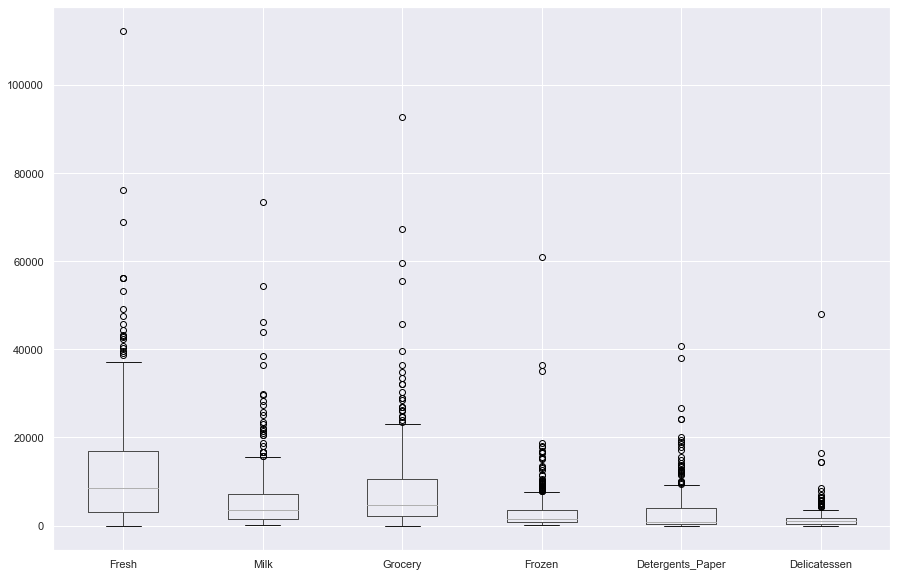

In [14]:
#sns.boxplot(data=data['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'])
plt.figure(figsize=(15,10))
data.boxplot(column=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'])

* Yes, there are outliers in the dataset
* Outliers are defined as data points that are statistically inconsistent ith the rest of the data. 
* Outlier implies experimental error or occurs due to random variation. In other words, Outlier is an observation that appears far away and diverges from an overall pattern in a sample. Hence the treatment of the outliers become necessary before proceeding further.
* 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper' and 'Delicatessen' contains outliers 

## 1.5. On the basis of this report, what are the recommendations?

#### Strategy for Hotel Channel:
* Hotel is B2B nature, we need to do a deeper research in all the regions to make an observation on the needs of the customers of this channel, the total number of hotels in those regions were the spending is not picking up to improve them further; It is also important to retain the existing customers and bring in new customers.

#### Strategy for Retail Channel:
* Retail is B2C. Hence it is important to understand whether the retail who buys from this particular wholesaler buys from any other wholesaler or not. If yes, what are the products he is buying and why is he buying from that wholesaler instead of us(this wholesaler) and how can we convert this retailer to totally buy from us. In this case, 'loyalty programs' can encourage them to an extent. Doing a research on the competition (Wholesalers), will also provide a deeper insights on the the prices they are offering and programs to hold the existing customers and to bring in new customers.

#### Regions:
* We saw that spending in regions like Oporto (both Hotel and Retail channel) is not picking up whereas the Other regions in both channels were the highest spender. It is possible that customer understanding in that particular region might be lacking. Understanding on what could possibly be improved in the regions will help changing the situation in Oporto.

# Problem 2
The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey.csv file).

### Part I

• 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major

2.1.2. Gender and Grad Intention

2.1.3. Gender and Employment

2.1.4. Gender and Computer


• 2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following questions:

2.2.1. What is the probability that a randomly selected CMSU student will be male?
What is the probability that a randomly selected CMSU student will be female?

2.2.2. Find the conditional probability of different majors among the male students in CMSU.
Find the conditional probability of different majors among the female students of CMSU.

2.2.3. Find the conditional probability of intent to graduate, given that the student is a male.
Find the conditional probability of intent to graduate, given that the student is a female.

2.2.4. Find the conditional probability of employment status for the male students as well as for the female students.

2.2.5. Find the conditional probability of laptop preference among the male students as well as among the female students.
 
 
• 2.3. Based on the above probabilities, do you think that the column variable in each case is independent of Gender?
Justify your comment in each case.


### Part II

•	2.4. Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.
Write a note summarizing your conclusions. [Recall that symmetric histogram does not necessarily mean that the underlying distribution is symmetric]


### About the Survey Data:
1) ID- Student's Number

2) Gender- Gender of the students (Male/Female)

3) Age- Age (in number of years) of the student

4) Class- Class of the students (Junior/Senior/Sophomore)

5) Major- Major subject of the students (Accounting/CIS/Economics Finance/International Business/Management/Other/Retailing Marketing/Undecided)

6) Grad Intention- Whether students have the intention to graduate (Yes/No/Undecided)

7) GPA- GPA Score of the students

8) Employment- Employment status of the students (Full-Time/Part-Time/Unemployed)

9) Salary (Continuous)- Salary earned by the students 

10) Spending (Continuous)- Spending by the students 

11) Computer- Computer owned by the students (Desktop/Laptop/Tablet)

12) Text Message (Continuous)- Number of text messages by the students

In [15]:
#Loading libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns   
import matplotlib.pyplot as plt
sns.set(color_codes=True) 
%matplotlib inline
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
from statsmodels.stats import weightstats as stests
from scipy.stats import shapiro
import statsmodels.api as sm 
import pylab as py 

In [16]:
#Loading the data
survey=pd.read_csv('Survey-1.csv')

## 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

### 2.1.1. Gender and Major

In [17]:
survey_crosstab_1 = pd.crosstab(survey['Gender'],survey['Major']) 
print(survey_crosstab_1) 

Major   Accounting  CIS  Economics/Finance  International Business  \
Gender                                                               
Female           3    3                  7                       4   
Male             4    1                  4                       2   

Major   Management  Other  Retailing/Marketing  Undecided  
Gender                                                     
Female           4      3                    9          0  
Male             6      4                    5          3  


### 2.1.2. Gender and Grad Intention

In [18]:
survey_crosstab_2 = pd.crosstab(survey['Gender'],survey['Grad Intention']) 
print(survey_crosstab_2)

Grad Intention  No  Undecided  Yes
Gender                            
Female           9         13   11
Male             3          9   17


### 2.1.3. Gender and Employment

In [19]:
survey_crosstab_3 = pd.crosstab(survey['Gender'],survey['Employment']) 
print(survey_crosstab_3)

Employment  Full-Time  Part-Time  Unemployed
Gender                                      
Female              3         24           6
Male                7         19           3


### 2.1.4. Gender and Computer

In [20]:
survey_crosstab_4 = pd.crosstab(survey['Gender'],survey['Computer']) 
print(survey_crosstab_4)

Computer  Desktop  Laptop  Tablet
Gender                           
Female          2      29       2
Male            3      26       0


## 2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following questions:

### 2.2.1. What is the probability that a randomly selected CMSU student will be male? What is the probability that a randomly selected CMSU student will be female?

In [21]:
prob_male_student_being_selected = 29 /62
prob_female_student_being_selected = 33 /62
print('The Probability % that a randomly selected CMSU student being male is',round(prob_male_student_being_selected,4)*100,'%')
print('The Probability % that a randomly selected CMSU student being female is',round(prob_female_student_being_selected,4)*100,'%')

The Probability % that a randomly selected CMSU student being male is 46.77 %
The Probability % that a randomly selected CMSU student being female is 53.23 %


### 2.2.2. Find the conditional probability of different majors among the male students in CMSU. Find the conditional probability of different majors among the female students of CMSU.

In [22]:
prob_Accounting_male = 4/29
prob_Accounting_female = 3/33
print('Probability of Accounts as a major among male is',round(prob_Accounting_male,4))
print('Probability of Accounts as a major among female is',round(prob_Accounting_female,4))
print('\n')
prob_CIS_male = 1/29
prob_CIS_female = 3/33
print('Probability of CIS as a major subject among male is',round(prob_CIS_male,4))
print('Probability of CIS as a major subject among female is',round(prob_CIS_female,4))
print('\n')
prob_EcoFin_male = 4/29
prob_EcoFin_female = 7/33
print('Probability of Economics/Finance as a major subject among male is',round(prob_EcoFin_male,4))
print('Probability of Economics/Finance as a major subject among female is',round(prob_EcoFin_female,4))
print('\n')
prob_IntBus_male = 2/29
prob_IntBus_female = 4/33
print('Probability of International Business as a major subject among male is',round(prob_IntBus_male,4))
print('Probability of International Business as a major subject among female is',round(prob_IntBus_female,4))
print('\n')
prob_Mang_male = 6/29
prob_Mang_female = 4/33
print('Probability of Management as a major subject among male is',round(prob_Mang_male,4))
print('Probability of Management as a major subject among female is',round(prob_Mang_female,4))
print('\n')
prob_Others_male = 4/29
prob_Others_female = 3/33
print('Probability of Others as a major among male is',round(prob_Others_male,4))
print('Probability of Others as a major among female is',round(prob_Others_female,4))
print('\n')
prob_RetMkt_male = 5/29
prob_RetMkt_female = 9/33
print('Probability of Retail/Marketing as a major subject among male is',round(prob_RetMkt_male,4))
print('Probability of Retail/Marketing as a major subject among female is',round(prob_RetMkt_female,4))
print('\n')
prob_Undec_male = 3/29
prob_Undec_female = 0/33
print('Probability of Undecided subject among male is',round(prob_Undec_male,4))
print('Probability of Undecided subject among female is',round(prob_Undec_female,4))

Probability of Accounts as a major among male is 0.1379
Probability of Accounts as a major among female is 0.0909


Probability of CIS as a major subject among male is 0.0345
Probability of CIS as a major subject among female is 0.0909


Probability of Economics/Finance as a major subject among male is 0.1379
Probability of Economics/Finance as a major subject among female is 0.2121


Probability of International Business as a major subject among male is 0.069
Probability of International Business as a major subject among female is 0.1212


Probability of Management as a major subject among male is 0.2069
Probability of Management as a major subject among female is 0.1212


Probability of Others as a major among male is 0.1379
Probability of Others as a major among female is 0.0909


Probability of Retail/Marketing as a major subject among male is 0.1724
Probability of Retail/Marketing as a major subject among female is 0.2727


Probability of Undecided subject among male is 0.1034
Pro

### 2.2.3. Find the conditional probability of intent to graduate, given that the student is a male. Find the conditional probability of intent to graduate, given that the student is a female.

In [23]:
prob_No_Intention_Grad_male = 3/29
prob_No_Intention_Grad_female = 9/33
print('Probability of no intent to graduate among male is',round(prob_No_Intention_Grad_male,4))
print('Probability of no intent to graduate among female is',round(prob_No_Intention_Grad_female,4))
print('\n')
prob_Yes_Intention_Grad_male = 9/29
prob_Yes_Intention_Grad_female = 13/33
print('Probability with intent to graduate among male is',round(prob_Yes_Intention_Grad_male,4))
print('Probability with intent to graduate among female is',round(prob_Yes_Intention_Grad_female,4))
print('\n')
prob_Undecided_Intention_Grad_male = 17/29
prob_Undecided_Intention_Grad_female = 11/33
print('Probability with undecided intent to graduate among male is',round(prob_Undecided_Intention_Grad_male,4))
print('Probability with undecided intent to graduate among female is',round(prob_Undecided_Intention_Grad_female,4))

Probability of no intent to graduate among male is 0.1034
Probability of no intent to graduate among female is 0.2727


Probability with intent to graduate among male is 0.3103
Probability with intent to graduate among female is 0.3939


Probability with undecided intent to graduate among male is 0.5862
Probability with undecided intent to graduate among female is 0.3333


### 2.2.4. Find the conditional probability of employment status for the male students as well as for the female students.

In [24]:
prob_full_time_male = 7/29
prob_full_time_female = 3/33
print('Probability of full time employment among male is',round(prob_full_time_male,4))
print('Probability of full time employment among female is',round(prob_full_time_female,4))
print('\n')
prob_part_time_male = 19/29
prob_part_time_female = 24/33
print('Probability of part time employment among male is',round(prob_part_time_male,4))
print('Probability of part time employment among female is',round(prob_part_time_female,4))
print('\n')
prob_unemp_male = 3/29
prob_unemp_female = 6/33
print('Probability of unemployed among male is',round(prob_unemp_male,4))
print('Probability of unemployed among female is',round(prob_unemp_female,4))

Probability of full time employment among male is 0.2414
Probability of full time employment among female is 0.0909


Probability of part time employment among male is 0.6552
Probability of part time employment among female is 0.7273


Probability of unemployed among male is 0.1034
Probability of unemployed among female is 0.1818


### 2.2.5. Find the conditional probability of laptop preference among the male students as well as among the female students.

In [25]:
prob_desktop_male = 3/29
prob_desktop_female = 2/33
print('Probability of desktop among male is',round(prob_desktop_male,4))
print('Probability of desktop among female is',round(prob_desktop_female,4))
print('\n')
prob_laptop_male = 26/29
prob_laptop_female = 29/33
print('Probability of laptop among male is',round(prob_laptop_male,4))
print('Probability of laptop among female is',round(prob_laptop_female,4))
print('\n')
prob_tablet_male = 0/29
prob_tablet_female = 2/33
print('Probability of tablet among male is',round(prob_tablet_male,4))
print('Probability of tablet among female is',round(prob_tablet_female,4))

Probability of desktop among male is 0.1034
Probability of desktop among female is 0.0606


Probability of laptop among male is 0.8966
Probability of laptop among female is 0.8788


Probability of tablet among male is 0.0
Probability of tablet among female is 0.0606


## 2.3. Based on the above probabilities, do you think that the column variable in each case is independent of Gender? Justify your comment in each case.

•	Accounting and Gender
Male students choosing Accounting as their major is greater than that of female. It is a general perception that male students are good at maths compared to their female counterparts and also, they at future might want to pursue Chartered Accountancy which requires travelling from place to place. Hence it is intuitive that male prefer Accounting more than female. 

•	CIS and Gender
Computer sciences were pre-dominantly chosen by male students but this trend in recent times are changing because of more job availability in this field. Hence we see quite a difference in CIS major in female, which is higher than that of male.

•	Economics/Finance and Gender
According to the IMF article, there is a closing gap in terms of career in Finance/Economics field, as women might be better in risk management than men and more women on boards will lead to better decisions. Seeing this as a career option can explain the above probability in this case.

•	International Business and Gender
Business involves lot of risk-taking. ‘Risk-Taking’ has gender bias, according to the Harvard Business Review article, men are less risk-averse than women under stress. But the conditional probability of International Business given female is greater than that of male is an interesting phenomenon. This part can be understood as change in risk-averse minds of the people and that female will also have potential to take risk under stress.

•	Management and Gender
Management also quite a gender bias. In many companies, top managers are mostly male rather than female due to the pressure from their families, only career-oriented women could achieve higher positions in management this might influence the students in choosing their majors and explains why the probability for male is much higher for female.

•	Retailing/Marketing and Gender
Women are blessed with attributes that make them crucial for retail. The ability to be pleasant, tolerance, compassion, stable, effectively communicate with customers makes women more suitable for specific retail roles. This explains why more female students prefer Retailing and Marketing as their major subject compared to their male counterparts.

•	Undecided and Gender
As expected, the probability of ‘undecided’ is the least since most of the students are up-to data with the current situation in the market and they choose their majors basis that.

•	Intent or No Intent to Graduate and Gender
‘Intent’ or ‘No intent’ to graduate is also closely related to ‘Gender’. It is generally observed the drop-outs rate especially in developed countries like U.S. are very high and is even higher for the female population as parents or spouses become unemployed, financial aid status or eligibility change, family needs (caring for family members, pregnancy, or illness). One main consequences is that there would be a shortage of skilled workers in the working population. 

•	Employment and Gender
Employment and Gender is closely related to each other as well. According to the International Labour Organization report, finding a job is much tougher for women than it is for men. This explains the ‘Unemployment’ rate for male is lesser than for female in this case. When women are employed, they tend to work in low-quality jobs in vulnerable conditions. For women, working full-time tends to be difficult in general, which explains the lower probability in case of female than in male and hence they mostly prefer part-time jobs instead of full-time.

•	Laptop Preference and Gender
Laptop preference is gender sensitive. Female students, in general, female is price sensitive and less sensitive to the features of laptop/desktop on the contrary to their male counterparts. That is why we see that laptop is preferred both by male and female students, however, probability of male over female is higher.


## 2.4. Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions. [Recall that symmetric histogram does not necessarily mean that the underlying distribution is symmetric]

In [26]:
stat, p = shapiro(survey['Salary'])
print('statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('it follows Normal distribution')
else:
    print('it does not follow Normal distribution')

statistics=0.957, p=0.028
it does not follow Normal distribution


In [27]:
stat, p = shapiro(survey['Spending'])
print('statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('it follows Normal distribution')
else:
    print('it does not follow Normal distribution')

statistics=0.878, p=0.000
it does not follow Normal distribution


In [28]:
stat, p = shapiro(survey['Text Messages'])
print('statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('it follows Normal distribution')
else:
    print('it does not follow Normal distribution')

statistics=0.859, p=0.000
it does not follow Normal distribution


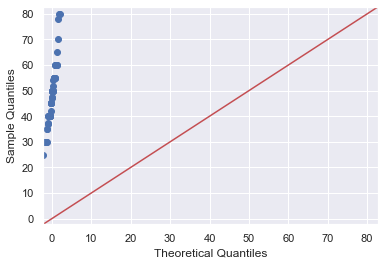

In [29]:
sm.qqplot(survey['Salary'], line ='45') 
py.show() 

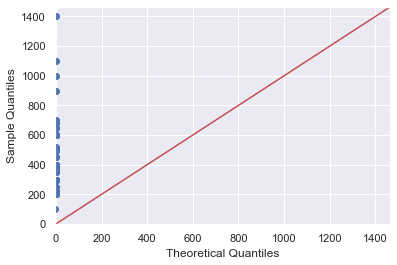

In [30]:
sm.qqplot(survey['Spending'], line ='45') 
py.show() 

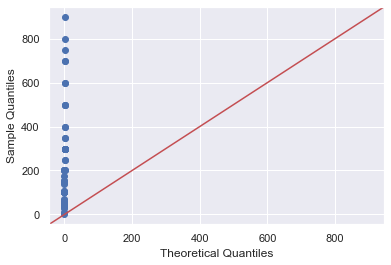

In [31]:
sm.qqplot(survey['Text Messages'], line ='45') 
py.show() 

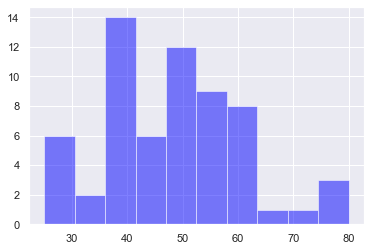

In [32]:
plt.hist(survey['Salary'], facecolor='blue', alpha=0.5);

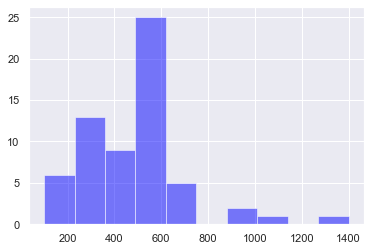

In [33]:
plt.hist(survey['Spending'], facecolor='blue', alpha=0.5);

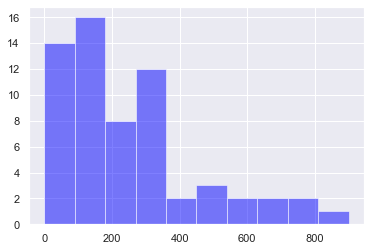

In [34]:
plt.hist(survey['Text Messages'], facecolor='blue', alpha=0.5);

## Problem 3
An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company claims that the mean moisture content cannot be greater than 0.35 pound per 100 square feet.
The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

For the A shingles, the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet  is given:
Null<=0.35
Alt >0.35

For the B shingles, the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet is given:
Null<=0.35
Alt >0.35

3.1 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

3.2 What assumption about the population distribution is needed in order to conduct the hypothesis tests above?


### About the A & B Shingles Data:

1)  A : Moisture content (in pounds per 100 square feet) for A shingles 

2)  B : Moisture content (in pounds per 100 square feet) for B shingles

In [35]:
import numpy as np
import pandas as pd
import os
import seaborn as sns   
import matplotlib.pyplot as plt
sns.set(color_codes=True) 
%matplotlib inline
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
from statsmodels.stats import weightstats as stests
import statsmodels.stats.api as sm
import matplotlib.pyplot as plt

In [36]:
a_n_b=pd.read_csv('A & B shingles-1.csv')

## 3.1. Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. 

### STEP-1:- Hypothesis Formation

Null : Mu (Shingles A) = Mu (Shingles B)  or  Mu (Shingles A) - Mu (Shingles B) = 0

Alt  : Mu (Shingles A) ≠ Mu (Shingles B) or Mu (Shingles A) - Mu (Shingles B) ≠ 0

### STEP-2:- Deciding the Significance Level

By default, the alpha value is 0.05 with unknown population standard deviation

### STEP-3:- Identifying the Test Statistic

* We have two samples and we do not know the population standard deviation.
* Sample sizes for the samples are not same.
* Here, we will use two-sample t-test (Independent Samples)

### STEP-4:- t-Statistic, t-Critical and p-Value

In [37]:
x1_bar = a_n_b['A'].mean()
print(x1_bar)
x2_bar = a_n_b['B'].mean()
print(x2_bar)
sd_1 = a_n_b['A'].std()
print(sd_1)
sd_2 = a_n_b['B'].std()
print(sd_2)
n1 = 36
n2 = 31

0.3166666666666666
0.2735483870967742
0.13573082605973166
0.13729647694185443


In [38]:
num = (x1_bar - x2_bar)
den = np.sqrt((sd_1**2/n1) + (sd_2**2/n2))

In [39]:
t = num/den
t

1.2885080295255011

In [40]:
df_num = ((sd_1**2/n1) + (sd_2**2/n2)) **2
df_num

1.2539989683507894e-06

In [41]:
a=sd_1**4
b=sd_2**4
c=n1**2
d=n2**2
e=n1-1
f=n2-1

In [42]:
df_den = (a/(c*e))+ (b/(d*f))
df_den

1.980757038586641e-08

In [43]:
df = df_num/df_den
df

63.30907546569032

In [44]:
tcritical = stats.t.ppf(0.05/2,df)
tcritical

-1.9981496317214953

In [45]:
p=stats.t.cdf(t,df)
p

0.8988708897489106

### Step-5:- Conclusion
* From the above, we can conclude that since p-Value > alpha (which is 0.05) and also, t calculated > t critical
* We fail to reject null and concude that:  Mu (Shingles A) = Mu (Shingles B)  or  Mu (Shingles A) - Mu (Shingles B) = 0
* In other words, population means of shingle A & shingle B are equal.

## 3.1. What assumption do you need to check before the test for equality of means is performed?

### Assumption for the test for equality of means: 
* Population is Normally Distributed
* Equal variance for both populations
* Each sample value is independent of the other values

## 3.2 What assumption about the population distribution is needed in order to conduct the hypothesis tests above?

### To conduct the above test:
*  Population is normally distributed
*  Data are assumed to drawn independently from the population
*  Here, n1 and n2 are greater than 30, if population distribution is not skewed then t-distribution is the preferred test in this case.